# Pivot Tables with Pandas - Lab

## Introduction

In this lab, use pivot tables with real-world data.  

## Objectives

In this lab you will:

- Describe what is meant by long and wide format data 
- Use multi-hierarchical indexing to access aggregated data 
- Use pivot to create a more organized aggregated DataFrame 
- Use stack and unstack to move between different level of multi-indexing 

## Getting Started

In the cell below:

* Import `pandas` and set the standard alias   
* Import `matplotlib.pyplot` and set the standard alias   
* Run the iPython magic command to display matplotlib graphs inline within the notebook

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data
The data for this activity is stored in a file called `'causes_of_death.tsv'` which is a somewhat morbid dataset from the center for disease control. Note that the file extension .tsv indicates that this data is formatted slightly differently then the standard .csv, the difference being that it has 'tab separated values' instead of 'comma separated values'. As such, pass in the optional parameter `delimiter='\t'` into the `pd.read_csv()` function.

In [216]:
df = pd.read_csv('causes_of_death.tsv',delimiter='\t')

Now, display the head of the DataFrame to ensure everything loaded correctly.

In [210]:
df.head()

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,14,3579,Unreliable
1,NaN,Alabama,1,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443,322.5
2,NaN,Alabama,1,< 1 year,1,Female,F,Black or African American,2054-5,2093,169339,1236.0
3,NaN,Alabama,1,< 1 year,1,Female,F,White,2106-3,2144,347921,616.2
4,NaN,Alabama,1,< 1 year,1,Male,M,Asian or Pacific Islander,A-PI,33,7366,448.0


Our data is currently in **_Wide_** format.  We can tidy this up by converting it to **_Long_** format by using groupby statements to aggregate our data into a much neater, more readable format. 

## Groupby aggregations

Complete the following groupby statements.

- Groupby `State` and `Gender`. Sum the values.

In [212]:
sum_sg = df.groupby(['State','Gender'])[['Deaths','Population']].sum()
sum_sg

Deaths  \
State         Gender           
Alabama       Female  430133   
              Male    430647   
Alaska        Female   27199   
              Male     36135   
Arizona       Female  396028   
...                      ...   
West Virginia Male    192560   
Wisconsin     Female  436397   
              Male    421232   
Wyoming       Female   37153   
              Male     40233   

                                                             Population  
State         Gender                                                     
Alabama       Female  3579744316933934792130421670420138969917770313...  
              Male    7366173241364029686063145720872892182789338091...  
Alaska        Female  2168760316134578138005022606520406158314218426...  
              Male    2288864936865613228740523928421582768517561306...  
Arizona       Female  6214625807482726333592356161050571897442516461...  
...                                                                 ...  
West Virginia Male    1035817800339927709012950531889227121349205906...  
Wisconsin     Female  1230022229679805032704411891987271317204719510...  
              Male    1196722488698105292694570292780279183214868410...  
Wyoming       Female  3260577912309932568058956922497630970186815732...  
              Male    3366157260874242665264686273552475017397692318...  

[102 rows x 2 columns]

- Groupby `State`, `Gender`, and `Race`. Find the average values.

In [232]:
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')
sgr = df.groupby(['State','Gender','Race'])[['Deaths','Population']].mean()
sgr

Deaths    Population
State   Gender Race                                                        
Alabama Female American Indian or Alaska Native     70.875000  2.280012e+04
               Asian or Pacific Islander            95.500000  4.602280e+04
               Black or African American          9074.000000  1.090735e+06
               White                             29890.636364  2.773436e+06
        Male   American Indian or Alaska Native     86.375000  2.849600e+04
...                                                       ...           ...
Wyoming Female White                              3279.454545  4.128256e+05
        Male   American Indian or Alaska Native    103.000000  1.229850e+04
               Asian or Pacific Islander            15.000000  1.965000e+03
               Black or African American            28.333333  6.373111e+03
               White                              3533.909091  4.256962e+05

[408 rows x 2 columns]

- Groupby `Gender` and `Race`. Find the minimum values.

In [233]:
min_gr = df.groupby(['Gender','Race']).min()
min_gr

Notes    State  State Code  \
Gender Race                                                           
Female American Indian or Alaska Native    NaN  Alabama           1   
       Asian or Pacific Islander           NaN  Alabama           1   
       Black or African American           NaN  Alabama           1   
       White                               NaN  Alabama           1   
Male   American Indian or Alaska Native    NaN  Alabama           1   
       Asian or Pacific Islander           NaN  Alabama           1   
       Black or African American           NaN  Alabama           1   
       White                               NaN  Alabama           1   

                                        Ten-Year Age Groups  \
Gender Race                                                   
Female American Indian or Alaska Native           1-4 years   
       Asian or Pacific Islander                  1-4 years   
       Black or African American                  1-4 years   
       White                                      1-4 years   
Male   American Indian or Alaska Native           1-4 years   
       Asian or Pacific Islander                  1-4 years   
       Black or African American                  1-4 years   
       White                                      1-4 years   

                                        Ten-Year Age Groups Code Gender Code  \
Gender Race                                                                    
Female American Indian or Alaska Native                        1           F   
       Asian or Pacific Islander                               1           F   
       Black or African American                               1           F   
       White                                                   1           F   
Male   American Indian or Alaska Native                        1           M   
       Asian or Pacific Islander                               1           M   
       Black or African American                               1           M   
       White                                                   1           M   

                                        Race Code  Deaths  Population  \
Gender Race                                                             
Female American Indian or Alaska Native    1002-5      10       232.0   
       Asian or Pacific Islander             A-PI      10       246.0   
       Black or African American           2054-5      10       283.0   
       White                               2106-3      12     26508.0   
Male   American Indian or Alaska Native    1002-5      10       183.0   
       Asian or Pacific Islander             A-PI      10       132.0   
       Black or African American           2054-5      10       148.0   
       White                               2106-3      10     21411.0   

                                        Crude Rate  
Gender Race                                         
Female American Indian or Alaska Native       10.4  
       Asian or Pacific Islander              10.1  
       Black or African American             100.3  
       White                                  10.1  
Male   American Indian or Alaska Native    10000.0  
       Asian or Pacific Islander              10.0  
       Black or African American            1000.4  
       White                                  10.6

Create a bar chart of the total number of deaths by state: 

* Sort your columns in order (ascending or descending are both acceptable).  
* Also make sure to include a title, axes labels and have your graph be an appropriate size.

**_NOTE:_** In order to do this, slice the `Deaths` column after the `.groupby()` method, but before the `.sum()` method.  You can even chain the `.plot()` method on after the `.sum()` method and do this all on one line, excluding the labeling of the graph.

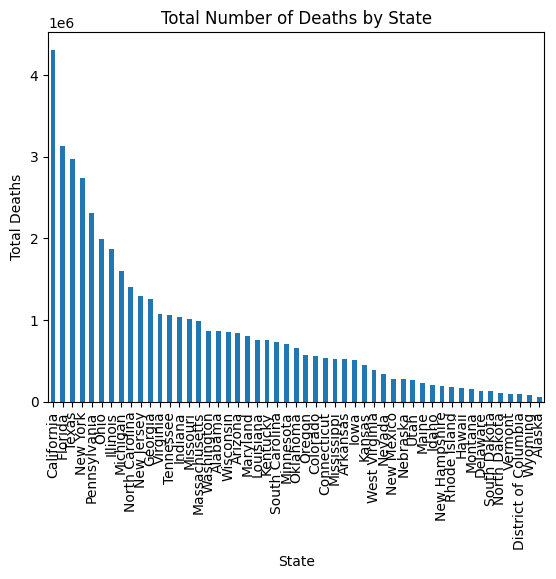

In [234]:
ax = df.groupby('State')['Deaths'].sum().sort_values(ascending=False).plot(kind='bar', title='Total Number of Deaths by State')
ax.set_xlabel('State')
ax.set_ylabel('Total Deaths')
plt.show()

### Inspecting our data

Let's go one step further and print the data type of each column. 

In the cell below, use the `.info()` method of the DataFrame, and note the data type that each column is currently stored as.  

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Notes                     0 non-null      float64
 1   State                     4115 non-null   object 
 2   State Code                4115 non-null   int64  
 3   Ten-Year Age Groups       4115 non-null   object 
 4   Ten-Year Age Groups Code  4115 non-null   object 
 5   Gender                    4115 non-null   object 
 6   Gender Code               4115 non-null   object 
 7   Race                      4115 non-null   object 
 8   Race Code                 4115 non-null   object 
 9   Deaths                    4115 non-null   int64  
 10  Population                4040 non-null   float64
 11  Crude Rate                4115 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 385.9+ KB


Let's look at some samples from the `Population` column to see if the current encoding seems appropriate for the data it contains. 

In the cell below, display the population values for the first 5 rows in the DataFrame.  

In [236]:
df['Population'].head(5)

0      3579.0
1      7443.0
2    169339.0
3    347921.0
4      7366.0
Name: Population, dtype: float64

Just to be extra sure, let's check the value counts to see how many times each unique value shows up in the dataset. We'll only look at the top 5. 

In the cell below, print out the top 5 `value_counts()` of the population column of the DataFrame. 

In [237]:
df['Population'].value_counts().head(5)

Population
9192.0     2
30070.0    2
860.0      2
2816.0     2
1512.0     2
Name: count, dtype: int64

Clearly, this data should be stored as a numeric type, not a categorical type.  
 
### Reformat the `Population` column as an integer
As it stands, not all values can be reformated as integers. Most of the cells in the `Population` column contain integer values, but the entire column is currently encoded in string format because some cells contain the string `'Not Applicable'`.

We need to remove these rows before we can cast the `Population` column to an integer data type. 

In the cell below:

* Slice the rows of `df` where the `Population` column is equal to `'Not Applicable'`  
* Use `to_drop.index` to drop the offending rows from `df`. Be sure to set the `axis=0`, and `inplace=True`  
* Cast the `Population` column to an integer data type using the `.astype()` method, with the single parameter `int64` passed in  
* Print the `Population` column's `dtype` attribute to confirm it is now stored in `int64` format  


**_NOTE:_** `.astype()` returns a copy of the column, so make sure you set the Population column equal to what this method returns--don't just call it.

In [239]:
# Your code here
to_drop = df[df['Population']=='Not Applicable']
drop_rows = df.drop(index=to_drop.index, axis=0, inplace=True)
df['Population'] = pd.to_numeric(df['Population'], errors='coerce').astype('Int64')

### Complete the bar chart

Now that we've reformatted our data, let's create a bar chart of the mean `Population` by `State`. 

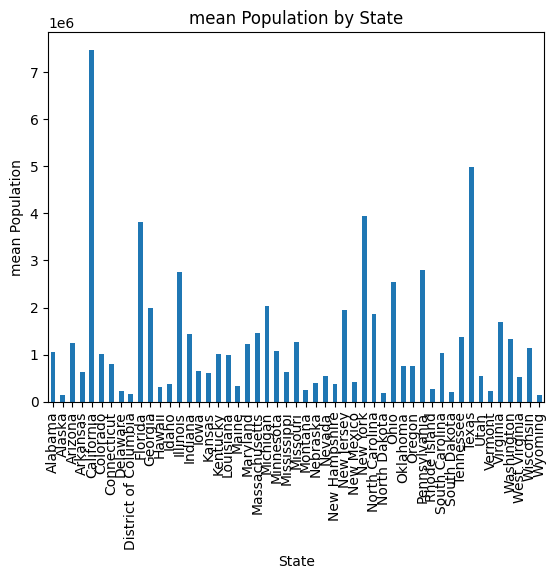

In [240]:
ax = df.groupby('State')['Population'].mean().plot(kind='bar', title='mean Population by State')
ax.set_xlabel('State')
ax.set_ylabel('mean Population')
plt.show()

Below we will investigate how we can combine the `.pivot()` method along with the `.groupby()` method to combine some cool **stacked bar charts**.

## Use aggregate methods

In the cell below:

* Group `df` by `'State'` and  `'Gender'`, and then slice both `'Deaths'` and `'Population'` from it. Chain the `.agg()` method to return the mean, min, max, and standard deviation of these sliced columns. 

**_NOTE:_** This only requires one line of code.  

By now, you've probably caught on that the code required to do this follows this pattern:    `([things to group by])[columns to slice].agg([aggregates to return])`

Then, display the `.head()` of this new DataFrame.

In [241]:
# Your code here
grouped = df.groupby(['State','Gender'])[['Deaths','Population']].agg(['mean','min','max','std'])
grouped.head()

Deaths                                Population         \
                        mean min     max           std            mean    min   
State   Gender                                                                  
Alabama Female  10753.325000  10  116297  24612.250487     1078712.675   2087   
        Male    10503.585366  10   88930  20620.218089      1014946.05   1129   
Alaska  Female    679.975000  13    4727   1154.870455      144040.275   1224   
        Male      860.357143  12    5185   1411.777392   151888.428571    578   
Arizona Female   8800.622222  21  133923  25979.871632  1246501.636364  12211   

                                         
                    max             std  
State   Gender                           
Alabama Female  4334752  1400309.398025  
        Male    4284775  1397829.524565  
Alaska  Female   682855   201579.338934  
        Male     770502   223884.300916  
Arizona Female  6265346  2096631.559045

Note how Pandas denotes a multi-hierarchical index in the DataFrame above.  

Let's inspect how a multi-hierarchical index is actually stored.  

In the cell below, display the `index` attribute of this DataFrame. 

In [242]:
grouped.index

MultiIndex([(      'Alabama', 'Female'),
            (      'Alabama',   'Male'),
            (       'Alaska', 'Female'),
            (       'Alaska',   'Male'),
            (      'Arizona', 'Female'),
            (      'Arizona',   'Male'),
            (     'Arkansas', 'Female'),
            (     'Arkansas',   'Male'),
            (   'California', 'Female'),
            (   'California',   'Male'),
            ...
            (     'Virginia', 'Female'),
            (     'Virginia',   'Male'),
            (   'Washington', 'Female'),
            (   'Washington',   'Male'),
            ('West Virginia', 'Female'),
            ('West Virginia',   'Male'),
            (    'Wisconsin', 'Female'),
            (    'Wisconsin',   'Male'),
            (      'Wyoming', 'Female'),
            (      'Wyoming',   'Male')],
           names=['State', 'Gender'], length=102)

A two-dimensional array denotes the multiple levels, with each possible combination being a row in our `grouped` DataFrame.  

Let's reset the index, and then see how it changes. 

In the cell below, call the DataFrame's `.reset_index()` method.  Then, display the `.head()` of the DataFrame.  

In [243]:
# First, reset the index. Notice the subtle difference; State and Gender are now columns rather than the index
grouped_reset_index = df.reset_index()
grouped_reset_index.head()

,index,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,0,NaN,Alabama,1,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,14,3579,Unreliable
1,1,NaN,Alabama,1,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443,322.5
2,2,NaN,Alabama,1,< 1 year,1,Female,F,Black or African American,2054-5,2093,169339,1236.0
3,3,NaN,Alabama,1,< 1 year,1,Female,F,White,2106-3,2144,347921,616.2
4,4,NaN,Alabama,1,< 1 year,1,Male,M,Asian or Pacific Islander,A-PI,33,7366,448.0


Note how the way index is displayed has changed.  The index columns that made up the multi-hierarchical index before are now stored as columns of data, with each row given a more traditional numerical index. 

Let's confirm this by reexamining the `index` attribute of `grouped` in the cell below.

In [244]:
grouped_reset_index.index

RangeIndex(start=0, stop=4115, step=1)

However, look again at the displayed DataFrame -- specifically, the columns. Resetting the index has caused the DataFrame to use a multi-indexed structure for the columns. 

In the cell below, examine the `columns` attribute of `grouped` to confirm this. 

In [245]:
# Notice that this causes columns to be MultiIndexed
grouped_reset_index.columns

Index(['index', 'Notes', 'State', 'State Code', 'Ten-Year Age Groups',
       'Ten-Year Age Groups Code', 'Gender', 'Gender Code', 'Race',
       'Race Code', 'Deaths', 'Population', 'Crude Rate'],
      dtype='object')

### Column levels

Since we're working with multi-hierarchical indices, we can examine the indices available at each level.

In the cell below, use the `.get_level_values()` method contained within the DataFrame's `columns` attribute to get the values for the outermost layer of the index. 

In [246]:
grouped.columns.get_level_values(0)

Index(['Deaths', 'Deaths', 'Deaths', 'Deaths', 'Population', 'Population',
       'Population', 'Population'],
      dtype='object')

Now, get the level values for the inner layer of the index. 

In [247]:
grouped.columns.get_level_values(1)
# print(df.columns)
# print(df.index)

Index(['mean', 'min', 'max', 'std', 'mean', 'min', 'max', 'std'], dtype='object')

## Flattening the DataFrame

We can also **_flatten_** the DataFrame from a multi-hierarchical index to a more traditional one-dimensional index.  We do this by creating each unique combination possible of every level of the multi-hierarchical index.  Since this is a complex task, you do not need to write it -- but take some time to examine the code in the cell below and see if you can understand how it works. 

In [248]:
# We could also flatten these:
cols0 = grouped.columns.get_level_values(0)
cols1 = grouped.columns.get_level_values(1)
grouped.columns = [
    col0 + "_" + col1 if col1 != "" else col0 for col0, col1 in list(zip(cols0, cols1))
]
# The list comprehension above is more complicated then what we need but creates a nicer formatting and
# demonstrates using a conditional within a list comprehension.
# This simpler version works but has some tail underscores where col1 is blank:
# grouped.columns = [col0 + '_' + col1 for col0, col1 in list(zip(cols0, cols1))]
grouped.columns

Index(['Deaths_mean', 'Deaths_min', 'Deaths_max', 'Deaths_std',
       'Population_mean', 'Population_min', 'Population_max',
       'Population_std'],
      dtype='object')

Now that we've flattened the DataFrame, let's inspect a couple rows to see what it looks like. 

In the cell below, inspect the `.head()` of the `grouped` DataFrame. 

In [249]:
grouped.head()

Deaths_mean  Deaths_min  Deaths_max    Deaths_std  \
State   Gender                                                       
Alabama Female  10753.325000          10      116297  24612.250487   
        Male    10503.585366          10       88930  20620.218089   
Alaska  Female    679.975000          13        4727   1154.870455   
        Male      860.357143          12        5185   1411.777392   
Arizona Female   8800.622222          21      133923  25979.871632   

                Population_mean  Population_min  Population_max  \
State   Gender                                                    
Alabama Female      1078712.675            2087         4334752   
        Male         1014946.05            1129         4284775   
Alaska  Female       144040.275            1224          682855   
        Male      151888.428571             578          770502   
Arizona Female   1246501.636364           12211         6265346   

                Population_std  
State   Gender                  
Alabama Female  1400309.398025  
        Male    1397829.524565  
Alaska  Female   201579.338934  
        Male     223884.300916  
Arizona Female  2096631.559045

## Using pivots

Now, we'll gain some practice using the DataFrame's built-in `.pivot()` method.  

In the cell below, call the DataFrame's `.pivot()` method with the following parameters:

* index = `'State'`
* columns = `'Gender'`
* values = `'Deaths_mean'`

Then, display the `.head()` of our new `pivot` DataFrame to see what it looks like. 

In [250]:
# Now it's time to pivot
grouped = grouped.reset_index()
pivot = grouped.pivot(index='State', columns='Gender', values='Deaths_mean')
pivot.head()

Gender,Female,Male
State,,
Alabama,10753.325000,10503.585366
Alaska,679.975000,860.357143
Arizona,8800.622222,9405.659574
Arkansas,6621.615385,6301.690476
California,45233.297872,46406.297872


We've just created a pivot table.  

Let's reset the index and see how it changes our pivot table. 

In the cell below, reset the index of the `pivot` object as we did previously.  Then, display the `.head()` of the object to see if we can detect any changes.

In [251]:
# Again, notice the subtle difference of resetting the index:
pivot = pivot.reset_index()
pivot.head()

Gender,State,Female,Male
0,Alabama,10753.325000,10503.585366
1,Alaska,679.975000,860.357143
2,Arizona,8800.622222,9405.659574
3,Arkansas,6621.615385,6301.690476
4,California,45233.297872,46406.297872


### Visualizing Data With Pivot Tables

Now, we'll make use of our newly created pivot table to quickly create some visualizations of our data.  

In the cell below, call `pivot.plot()` with the following parameters:

* kind = `'barh'`
* figsize = `(15,8)`

<Axes: >

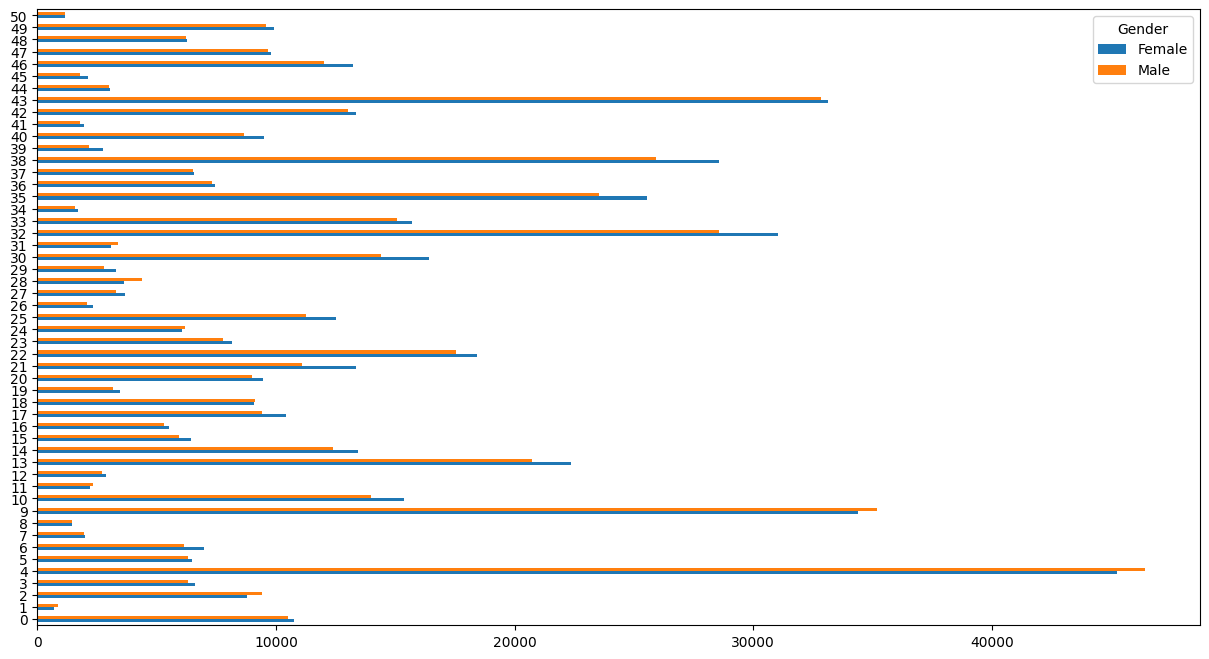

In [252]:
# Now let's make a sweet bar chart
pivot.plot(kind='barh',figsize=(15,8))

Notice the Y-axis is currently just a list of numbers.  That's because when we reset the index, it defaulted to assigning integers as the index for the DataFrame.  Let's set the index back to `'State'`, and then recreate the visualization. 

In the cell below:

* Use the `pivot` object's `.set_index()` method and set the index to `'State'`.  Then, chain this with a `.plot()` call to recreate the visualization using the code we used in the cell above.  

All the code in this cell should be done in a single line.  Just call the methods -- do not rebind `pivot` to be equal to this line of code. 

<Axes: ylabel='State'>

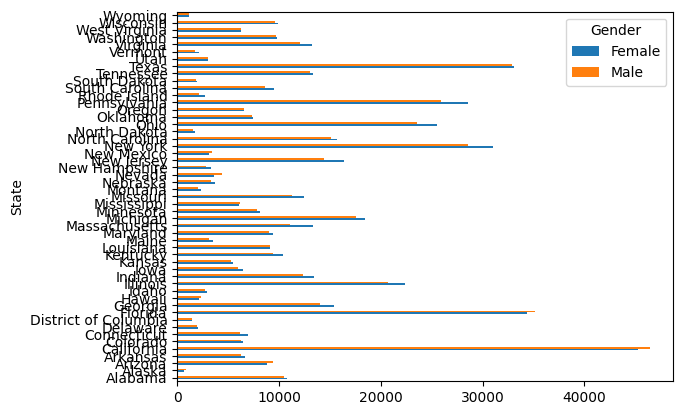

In [253]:
# Where are the states? Notice the y-axis is just a list of numbers.
# This is populated by the DataFrame's index.
# When we used the .reset_index() method, we created a new numbered index to name each row.
# Let's fix that by making state the index again.
pivot.set_index('State').plot(kind='barh')

Now that we've created a visualization with the states as the y-axis, let's print out the head of the `pivot` object again. 

In [254]:
# Also notice that if we call the DataFrame pivot again, state is not it's index.
# The above method returned a DataFrame with State as index and we plotted it,
# but it did not update the DataFrame itself.
pivot.head()

Gender,State,Female,Male
0,Alabama,10753.325000,10503.585366
1,Alaska,679.975000,860.357143
2,Arizona,8800.622222,9405.659574
3,Arkansas,6621.615385,6301.690476
4,California,45233.297872,46406.297872


Note that the index has not changed.  That's because the code we wrote when we set the index to the `'State'` column returns a copy of the DataFrame object with the index set to `'State'` -- by default, it does not mutate original `pivot` object.  

If we want to do that, we'll need to capture the new object returned by updating the contents of the `pivot` variable.  

In the cell below, set the index of `pivot` to `'State'`.  Then, recreate the bar plot using this new object.  

<Axes: xlabel='State'>

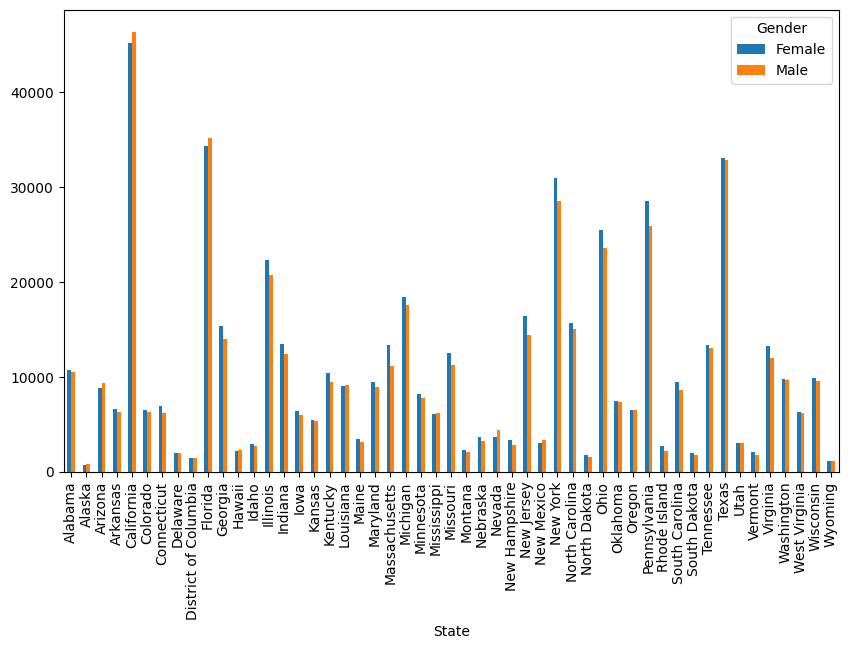

In [255]:
# If we wanted to more permanently change the index we would set it first and then plot:
pivot = pivot.set_index('State')
pivot.plot(kind='bar', figsize=(10, 6))


Again, let's check the `.head()` of the DataFrame to confirm that the index structure has changed.  

In [256]:
pivot.head()

Gender,Female,Male
State,,
Alabama,10753.325000,10503.585366
Alaska,679.975000,860.357143
Arizona,8800.622222,9405.659574
Arkansas,6621.615385,6301.690476
California,45233.297872,46406.297872


Finally, let's stack these bar charts to see how that looks. 

In the cell below, recreate the visualization we did in the cell above, but this time, also pass in `stacked=True` as a parameter. 

<Axes: xlabel='State'>

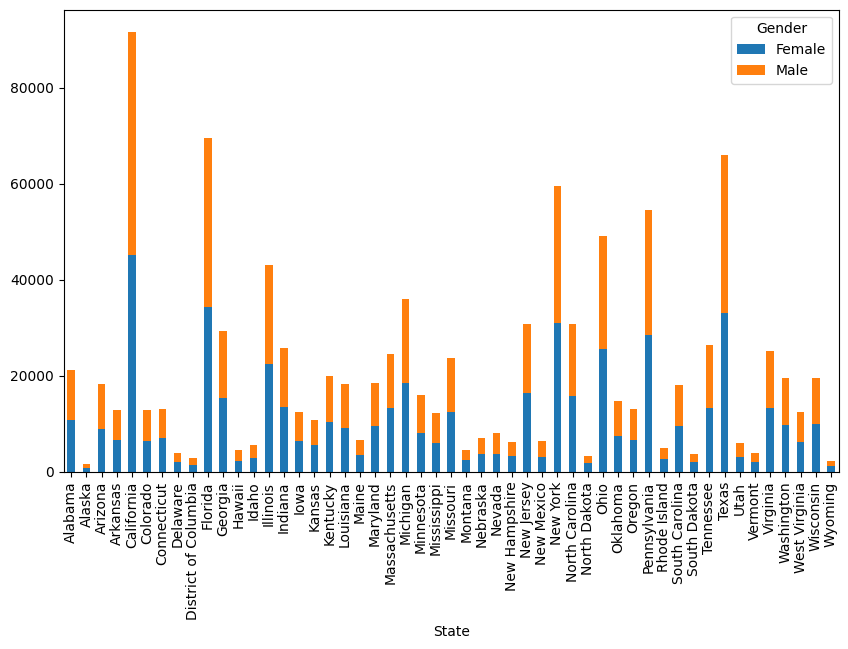

In [257]:
# Lastly, let's stack each of these bars for each state.
pivot.plot(kind='bar', figsize=(10, 6), stacked=True)
# Notice we don't have to worry about index here, because we've already set it above.

## Stacking and Unstacking DataFrames

Now, let's get some practice stacking and unstacking DataFrames. 

### Stacking

In the cell below, let's display the head of `grouped` to remind ourselves of the format we left it in. 

In [258]:
grouped.head()

,State,Gender,Deaths_mean,Deaths_min,Deaths_max,Deaths_std,Population_mean,Population_min,Population_max,Population_std
0,Alabama,Female,10753.325000,10,116297,24612.250487,1078712.675,2087,4334752,1400309.398025
1,Alabama,Male,10503.585366,10,88930,20620.218089,1014946.05,1129,4284775,1397829.524565
2,Alaska,Female,679.975000,13,4727,1154.870455,144040.275,1224,682855,201579.338934
3,Alaska,Male,860.357143,12,5185,1411.777392,151888.428571,578,770502,223884.300916
4,Arizona,Female,8800.622222,21,133923,25979.871632,1246501.636364,12211,6265346,2096631.559045


As we can see above, `grouped` is currently in a flattened format, with no hierarchical structure to it's indices.  

In the cell below, call the `grouped` DataFrame's `.stack()` method. 

In [259]:
grouped.stack()

0    State                    Alabama
     Gender                    Female
     Deaths_mean            10753.325
     Deaths_min                    10
     Deaths_max                116297
                            ...      
101  Deaths_std           2569.276968
     Population_mean         139223.6
     Population_min               244
     Population_max            694760
     Population_std     241359.853616
Length: 1020, dtype: object

As we can see, the `.stack()` method has stacked our DataFrame from a flattened format into one with a multi-hierarchical index. This is an easy, quick way to aggregate our data.

### Unstacking 

Now, we'll explore unstacking with the `pivot` DataFrame, which is already stacked into a pivot table. 

In the cell below, set unstack `pivot` using the object's `.unstack()` method. Then, display the object to see how it has changed. 

In [261]:
pivot = pivot.unstack()
pivot

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Gender,,,,,,,,,,,,,,,,,,,,,
Female,10753.325000,679.975000,8800.622222,6621.615385,45233.297872,6460.162791,6966.325000,2000.029412,1451.125000,34383.886364,...,1932.757576,13334.325000,33128.363636,3046.547619,2124.695652,13232.146341,9796.863636,6247.225806,9918.113636,1161.031250
Male,10503.585366,860.357143,9405.659574,6301.690476,46406.297872,6299.911111,6161.878049,1940.914286,1443.545455,35178.695652,...,1800.500000,13008.634146,32860.130435,3011.909091,1785.846154,12014.659091,9658.311111,6211.612903,9573.454545,1149.514286


Note that it has unstacked the multi-hierarchical structure of the `pivot` DataFrame by one level. Let's call it one more time and display the results.

In the cell below, set `pivot` equal to `pivot.unstack()` again, and then print the `pivot` object to see how things have changed.

In [263]:
pivot = pivot.unstack()
print(pivot)

State          Gender
Alabama        Female    10753.325000
               Male      10503.585366
Alaska         Female      679.975000
               Male        860.357143
Arizona        Female     8800.622222
                             ...     
West Virginia  Male       6211.612903
Wisconsin      Female     9918.113636
               Male       9573.454545
Wyoming        Female     1161.031250
               Male       1149.514286
Length: 102, dtype: float64


After calling unstack a second time, we can see that `pivot` has a flattened structure since it has been completely unstacked.

## Summary

In this lab, we learned how to:

* Use `.groupby()` to stack and slice data conditionally
* Use aggregate methods in combination with groupby statements
* Create pivot tables with pandas
* Leverage pivot tables and groupby statements to create quick visualizations
* `stack` and `unstack` DataFrames 